# Overview

**Workflow:**

1. Load the data
2. Clean it:
    * get rid of missing values
    * change column names
    * change dtypes for better memory use
3. Analyze it

**Data description:**

Outpatient prescription drugs paid for by state medicaid agencies. I'm guessing that each entry represents a hospital in a state.

**Notes:**

Some stats (appx):

* U.S. population: 325 million.
* 73 million people are on medicaid, that's just over 1/5th of the population.
* 40 million are on medicare.
* 8% of people are not insured.
* 37.7% are on government healthcare, 67% are on private health coverage.
* Out of private, employer based accounts for 56%.

Medicaid is a rather small sample of the population, it would be interesting to see a larger subset.

*Demographics of people on Medicaid:*

- Medicaid and CHIP participants are among the most vulnerable members of the U.S. population.

![alt text](medicaidstatistics.png)

* No one knows why so many kids have asthma! Interesting!

**Sources**

- https://www.census.gov/library/publications/2018/demo/p60-264.html
- https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2017/3v5r-x5x9
- https://www.prb.org/majority-of-people-covered-by-medicaid-and-similar-programs/
- https://www.verywellhealth.com/the-30-most-prescribed-drugs-in-pediatrics-2633435

**To do:**

- Figure out why the most common drugs are on there.
- Visualize the most commonly taken drugs.
- Do some cool things in plotly.

# Load drug data with selected columns and good memory usage

In [275]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [550]:
# Check available features

df2007 = pd.read_csv('State_Drug_Utilization_Data_2007.csv', low_memory=False)
df2007.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,MI,904,12,59,2007,2,ALLERGY,1516.0,False,20.0,52.86,0.00,0.0,4/1,04/01/2007,43.3504,-84.5603,"(43.3504, -84.5603)",00904001259
1,FFSU,NV,58177,329,4,2007,4,NATATAB FA,NaN,True,NaN,NaN,NaN,NaN,10/1,10/01/2007,38.4199,-117.1219,"(38.4199, -117.1219)",58177032904
2,FFSU,MT,591,388,1,2007,2,HYDROCODON,NaN,True,NaN,NaN,NaN,NaN,4/1,04/01/2007,46.9048,-110.3261,"(46.9048, -110.3261)",00591038801
3,FFSU,VA,54092,387,1,2007,4,ADDERALL X,86685.0,False,2182.0,360795.86,335550.96,25244.9,10/1,10/01/2007,37.7680,-78.2057,"(37.768, -78.2057)",54092038701
4,FFSU,CA,603,3740,21,2007,2,FUROSEMIDE,10547.0,False,213.0,2087.53,2087.53,0.0,4/1,04/01/2007,36.1700,-119.7462,"(36.17, -119.7462)",00603374021


In [2]:
# Load state drug data for 2008 - 2018

columns = ['State', 'Year', 'Product Name', 'Quarter', 'Number of Prescriptions']
filenames = ['State_Drug_Utilization_Data_' + str(i) + '.csv' for i in range(2007, 2018)]

df = pd.concat(pd.read_csv(filename, usecols=columns) 
               for filename in filenames)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39527716 entries, 0 to 4725198
Data columns (total 5 columns):
State                      object
Year                       int64
Quarter                    int64
Product Name               object
Number of Prescriptions    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ GB


In [5]:
df.sample(5)

,State,Year,Quarter,Product Name,Number of Prescriptions
1658516,VT,2009,3,IBUPROFEN,NaN
2444674,NM,2013,3,PACLITAXEL,34.0
1676090,MO,2012,1,VANCOMYCIN,NaN
577432,FL,2012,1,CEPHALEXIN,53.0
3390133,HI,2016,3,OMNIPAQUE,NaN


In [3]:
# Convert non-numeric columns to category to save memory

df[['State', 'Product Name', 'Quarter', 
    'Number of Prescriptions']] = df[['State','Product Name', 
                                      'Quarter','Number of Prescriptions']].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39527716 entries, 0 to 4725198
Data columns (total 5 columns):
State                      category
Year                       int64
Quarter                    category
Product Name               category
Number of Prescriptions    category
dtypes: category(4), int64(1)
memory usage: 984.6 MB


In [8]:
df.describe(include='all')

,State,Year,Quarter,Product Name,Number of Prescriptions
count,39527716,3.952772e+07,39527716.0,39520556,19480099.0
unique,52,NaN,4.0,33927,67594.0
top,XX,NaN,4.0,LISINOPRIL,15.0
freq,2371072,NaN,10068762.0,464392,360957.0
mean,NaN,2.012807e+03,NaN,NaN,NaN
std,NaN,2.995609e+00,NaN,NaN,NaN
min,NaN,2.007000e+03,NaN,NaN,NaN
25%,NaN,2.011000e+03,NaN,NaN,NaN
50%,NaN,2.013000e+03,NaN,NaN,NaN
75%,NaN,2.015000e+03,NaN,NaN,NaN


In [9]:
# TODO:
# 2. Do some frequency count plots
# 3. See which states use which drugs
# 4. Come up with some more questions

# Take care of the missing values in Product Name

In [5]:
# We have 3311 ?'s and 5854 NaNs

print((df['Product Name'] == '?').sum())
print(df.isna().sum())

# Replace ? with nan

df = df.replace('?', np.NaN)

3404
State                             0
Year                              0
Quarter                           0
Product Name                   7160
Number of Prescriptions    20047617
dtype: int64


In [6]:
df.isna().sum()

State                             0
Year                              0
Quarter                           0
Product Name                  10564
Number of Prescriptions    20047617
dtype: int64

In [7]:
# Just drop the nans, there aren't very many of them

df = df.dropna(subset=['Product Name'])
df.isna().sum()

State                             0
Year                              0
Quarter                           0
Product Name                      0
Number of Prescriptions    20038088
dtype: int64

In [8]:
# XX are aggregated entries, remove them

df = df[df.State != 'XX']


# What drugs are people on?

In this section, we will see the types of drugs people are taking in the U.S. by state, year, and time of year.

In [13]:
# Pearson correlation only shows numeric

df.corr()

,Year
Year,1.0


In [44]:
# Factorize into numbers for non-numeric correlations

df.apply(lambda x: x.factorize()[0]).corr()

,State,Year,Quarter,Product Name,Number of Prescriptions
State,1.000000,-0.008239,0.002205,-0.017380,-0.015266
Year,-0.008239,1.000000,0.004258,0.229291,0.007148
Quarter,0.002205,0.004258,1.000000,-0.006106,-0.001100
Product Name,-0.017380,0.229291,-0.006106,1.000000,-0.044218
Number of Prescriptions,-0.015266,0.007148,-0.001100,-0.044218,1.000000


In [16]:
df.sort_values(by='Number of Prescriptions', ascending=False).head(5)

,State,Year,Quarter,Product Name,Number of Prescriptions
432570,SD,2007,3,SPIRONOLAC,990000.0
1631471,SD,2007,3,STRATTERA,990000.0
1002654,SD,2007,3,FOSINOPRIL,990000.0
2048466,SD,2007,3,BENZTROPIN,990000.0
1887649,SD,2007,3,GLYBURIDE/,990000.0


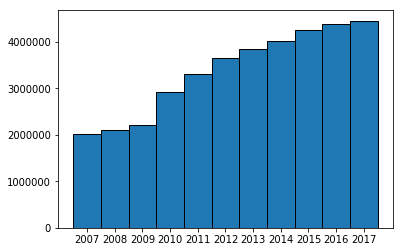

In [72]:
# Plot number of drugs being prescribed in the past 10 years

ig, ax = plt.subplots(1,1)
bins = np.arange(2007,2019)
ax.hist(df['Year'], bins=bins, align='left', ec='black')
ax.set_xticks(range(2007,2018));

# Number 

In [77]:
(df['Product Name'] == 'ALPRAZOLAM').value_counts()

False    36958190
True       191055
Name: Product Name, dtype: int64

In [43]:
# 7110 Entries for alprazolam
# this tell us that 7110 hospitals prescribed alprazolam from 2007 - 2017

(df[df['Product Name'] == 'ALPRAZOLAM']['State'] == 'CA').value_counts()

False    183945
True       7110
Name: State, dtype: int64

In [67]:
# Get a rough estimate of the # of prescriptions of Alpraz

# ca_df = df[(df['State'] == 'CA') & (df['Year'] == 2017)]
ca_df = df[df['State'] == 'CA']
ca_df[ca_df['Product Name'] == 'ALPRAZOLAM']['Number of Prescriptions'].dropna().astype('int').sum()

# 2,620,094 Xanax prescriptions in the past 10 years
# 454,817 in 2017

2620094

In [521]:
# Let's see the number of prescriptions by state

df_p = df[df['Number of Prescriptions'].notnull()]
df_p['Number of Prescriptions'] = df_p['Number of Prescriptions'].astype('int')

# Remove 990,000 outlier in 2007 for South Dakota

# df_p = df_p[df_p['Number of Prescriptions'] < 500000]
# df_p.sort_values(by='Number of Prescriptions').tail()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,State,Year,Quarter,Product Name,Number of Prescriptions
479082,SD,2007,3,RANITIDINE,490000
1029456,SD,2007,3,METHADOSER,490000
333464,SD,2007,3,LITHIUM CA,490000
98759,SD,2007,3,LEVOXYL .0,490000
1443875,SD,2007,3,JANTOVEN T,490000


In [489]:
# Sum prescriptions for each state

# df_s = df_p.sample(100)
pv = df_p.pivot_table(values='Number of Prescriptions', index='State', columns='Year', aggfunc=np.sum)
pv['Totals'] = pv.sum(axis=1)

In [490]:
pv

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Totals
State,,,,,,,,,,,,
MI,6.015284e+06,5939927.0,6597209.0,15789141.0,20207401.0,20034040.0,20339080.0,23824796.0,27449929.0,31249189.0,31437566.0,2.088836e+08
VA,3.911205e+06,4035983.0,4451442.0,5245006.0,10287523.0,10812711.0,11207378.0,10938647.0,10699848.0,11069048.0,10584494.0,9.324328e+07
CA,3.324254e+07,32709973.0,33876679.0,47484957.0,54922238.0,52184950.0,55189359.0,69622307.0,92910248.0,99175952.0,102320837.0,6.736400e+08
GA,6.218345e+06,6748069.0,7251874.0,11351149.0,13736188.0,16322713.0,16445996.0,16691847.0,16905060.0,16712454.0,17166415.0,1.455501e+08
KY,9.569844e+06,9701283.0,10413442.0,12321084.0,13299885.0,12884643.0,12039690.0,14814713.0,17473144.0,18368160.0,17813323.0,1.486992e+08
NJ,4.956174e+06,5465737.0,5495048.0,9127501.0,10583525.0,13577737.0,12347236.0,15643611.0,19416630.0,23331897.0,20317549.0,1.402626e+08
NC,1.304027e+07,14351953.0,15597138.0,16107806.0,16198633.0,16371258.0,15971071.0,16781514.0,16863580.0,16969943.0,16830684.0,1.750839e+08
OR,1.705752e+06,1652967.0,1806479.0,3917179.0,6069443.0,5349193.0,6132972.0,8445760.0,10048537.0,9942009.0,10554852.0,6.562514e+07
IN,5.038073e+06,4988902.0,5248996.0,12085864.0,11607717.0,12571502.0,11882283.0,11769464.0,13406037.0,17207302.0,16574743.0,1.223809e+08


In [252]:
# Discovering new things: no data for Arizona for 2007, 2008, 2009
# but why?

# starts with 2010...checked the actual csv, it's missing!
# they started recording the data in 2010

# Let's infer the values based on comparable states for those years
# AZ population is closest to massachussets so well fill in values from massachussets

values = {2007: 7607295.0, 2008: 7884396.0, 2009: 7719774.0}
pv = pv.fillna(value=values)

# Rerun the pivot table aggregation function

pv['Totals'] = pv.sum(axis=1)

# Check that MA and AZ totals are close

print(pv[pv.index == 'MA']['Totals'])
print(pv[pv.index == 'AZ']['Totals'])

State
MA    530987748.0
Name: Totals, dtype: float64
State
AZ    531092823.0
Name: Totals, dtype: float64


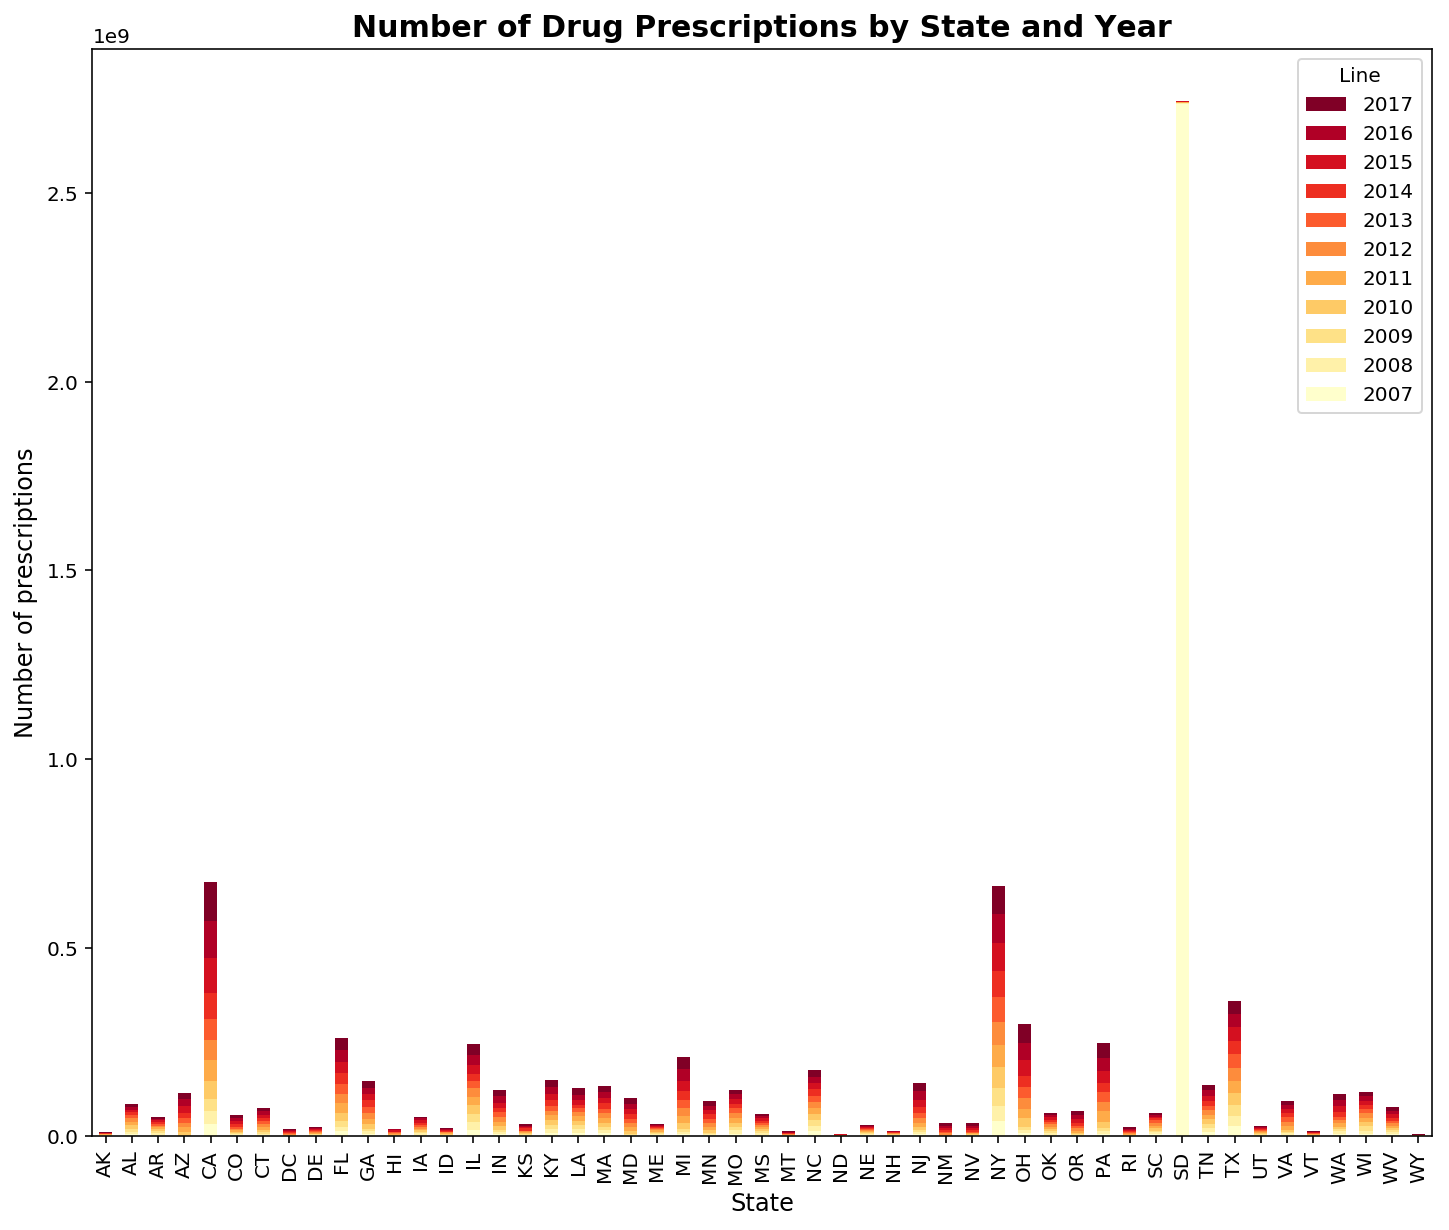

In [523]:
# Number of prescriptions by state 2007 - 2017

ax = pv.iloc[:,:-1].sort_values('State').plot.bar(stacked=True, figsize=(12,10), cmap="YlOrRd")
ax.set_title('Number of Drug Prescriptions by State and Year', size=15, weight='bold')
plt.ylabel('Number of prescriptions', size=12)
plt.xlabel('State', size=12)

# Reverse the legend labels and handles for better readability

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Line', loc='upper right');

In [446]:
# What's going on with South Dakota in 2007?

df[df.State == 'SD']['Number of Prescriptions'].sort_values(ascending=False).head(10)

# There are lots of 990000, could be data entry errors

1893287    990000.0
1955148    990000.0
588545     990000.0
337854     990000.0
1002654    990000.0
1827364    990000.0
91351      990000.0
432570     990000.0
323909     990000.0
1331726    990000.0
Name: Number of Prescriptions, dtype: category
Categories (67594, float64): [11.0, 12.0, 13.0, 14.0, ..., 2331828.0, 2357647.0, 2422174.0, 2492091.0]

In [512]:
# Fix 2007 South Dakota outlier

sd2007 = df[(df['State'] == 'SD') & (df['Year'] == 2007)].sort_values(by='Number of Prescriptions')
sd2007['Number of Prescriptions'] = sd2007['Number of Prescriptions'].dropna().astype('int')
(sd2007['Number of Prescriptions'] >= 2000).value_counts()

# It seems that every other year only had at most 2000 Prescriptions



False    6289
True     5843
Name: Number of Prescriptions, dtype: int64

# Goal for 2/5/2009: make an interactive visualization

1. Show what drugs people are on and why they are taking them.
2. Visualize the outlier

In [555]:
# Look at the outlier

df_p[(df_p['State'] == 'SD') & (df_p['Year'] == 2007)].describe()

# Too much data

,Year,Number of Prescriptions
count,5223.0,5223.000000
mean,2007.0,146779.696917
std,0.0,160234.754990
min,2007.0,12.000000
25%,2007.0,53.000000
50%,2007.0,90000.000000
75%,2007.0,280000.000000
max,2007.0,490000.000000


In [554]:
df2007[df2007['State'] == 'SD'].describe()

,Labeler Code,Product Code,Package Size,Year,Quarter,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Latitude,Longitude
count,12132.000000,12132.000000,12132.000000,12132.0,12132.000000,7891.000000,7891.000000,7.891000e+03,7891.000000,7891.000000,1.213200e+04,1.213200e+04
mean,22324.254946,1903.679525,19.768546,2007.0,3.511952,2338.879103,346982.683817,1.921234e+06,1355.452323,109.493830,4.428530e+01,-9.946320e+01
std,28011.928397,2292.628548,24.699620,0.0,0.499878,7591.480627,320155.589099,5.834723e+06,7525.560215,999.169163,8.022358e-12,1.360035e-11
min,2.000000,1.000000,0.000000,2007.0,3.000000,1.000000,12.000000,4.630000e+01,0.000000,0.000000,4.428530e+01,-9.946320e+01
25%,172.000000,302.000000,1.000000,2007.0,3.000000,120.000000,357.000000,3.812333e+04,0.000000,0.000000,4.428530e+01,-9.946320e+01
50%,591.000000,786.000000,9.000000,2007.0,4.000000,480.000000,280000.000000,3.000000e+05,0.000000,0.000000,4.428530e+01,-9.946320e+01
75%,53489.000000,3020.000000,30.000000,2007.0,4.000000,1678.500000,620000.000000,1.200000e+06,128.255000,0.000000,4.428530e+01,-9.946320e+01
max,99207.000000,9982.000000,99.000000,2007.0,4.000000,191556.000000,990000.000000,9.920000e+07,221914.630000,51838.370000,4.428530e+01,-9.946320e+01
